### Установка и импорт библиотек

In [4]:
!pip install opencv-python
!pip install matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 992.5 kB/s eta 0:00:001.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Загружаем изображение

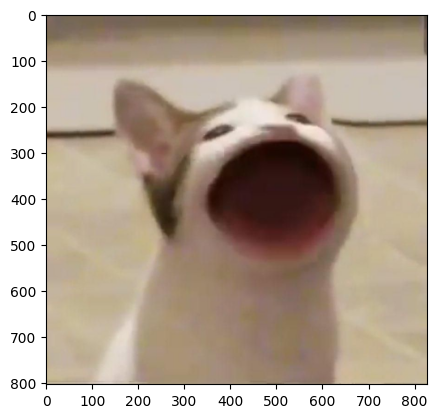

In [21]:
def read_img():
    cat = cv2.imread('cat.jpg')
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
    return cat

cat = read_img()
plt.imshow(cat)

### 1. Найти все orb features точки на изображении

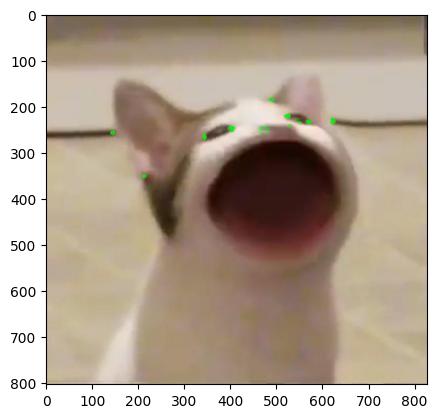

In [22]:
cat = read_img()
orb = cv2.ORB_create(nfeatures=100)
keypoints = orb.detect(cat, None)
keypoints, des = orb.compute(cat, keypoints)
cat_1 = cv2.drawKeypoints(cat, keypoints, None, color=(0,255,0), flags=0)
plt.imshow(cat_1)

### 2. Найти все sift features точки на изображении

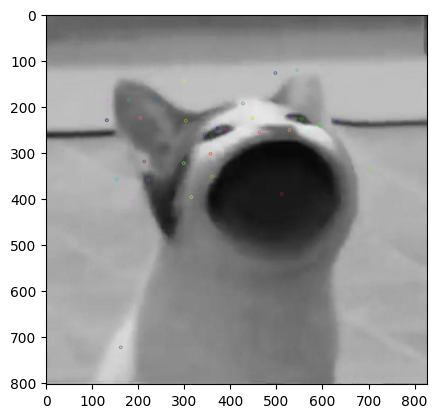

In [23]:
cat = read_img()
sift = cv2.SIFT_create()
gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
keypoints = sift.detect(gray, None)
cat_2 = cv2.drawKeypoints(gray, keypoints, cat)
plt.imshow(cat_2)

### 3. Перевести в grayscale

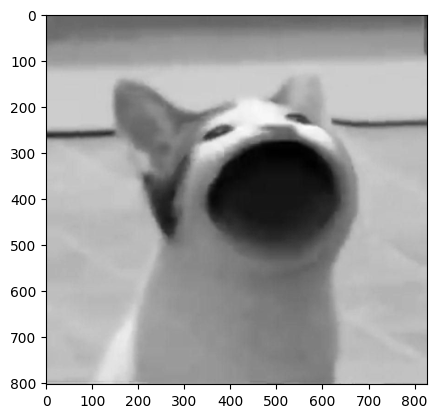

In [24]:
cat = read_img()
cat_3 = cv2.cvtColor(cat, cv2.COLOR_RGB2GRAY)
plt.imshow(cat_3, cmap='gray')

### 4. Повернуть изображение на 45 градусов

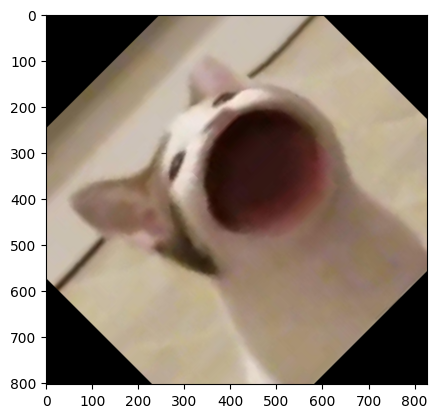

In [32]:
cat = read_img()
(height, width) = cat.shape[:2]
cX, cY = width // 2, height // 2
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
cat_4 = cv2.warpAffine(cat, M, (width, height))
plt.imshow(cat_4)

### 5. Повернуть изображение на 30 градусов вокруг заданной точки

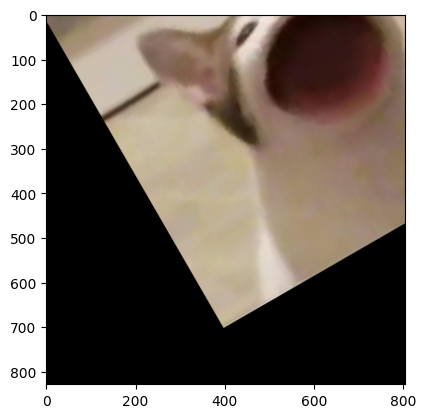

In [33]:
cat = read_img()
M = cv2.getRotationMatrix2D((11, 11), 30, 1.0)
cat_5 = cv2.warpAffine(cat, M, cat.shape[:2])
plt.imshow(cat_5)

### 6. Сместить изображение но 10 пикселей вправо

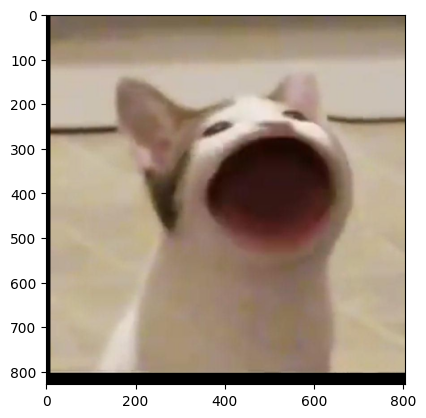

In [36]:
cat = read_img()
shift = np.float32([[1, 0, 10], [0, 1, 0]])
cat_6 = cv2.warpAffine(cat, shift, cat.shape[:2])
plt.imshow(cat_6)

### 7. Изменить контрасть изображения

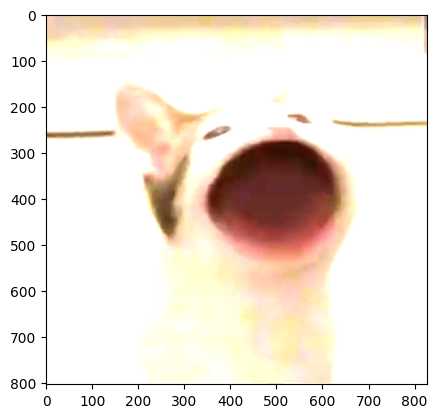

In [43]:
cat = read_img()
alpha = 2
beta = 0.3
cat_7 = cv2.addWeighted(cat, alpha, np.zeros(cat.shape, cat.dtype), 0, beta)
plt.imshow(cat_7)

### 8. Сделать гистограмную эквайлизацию

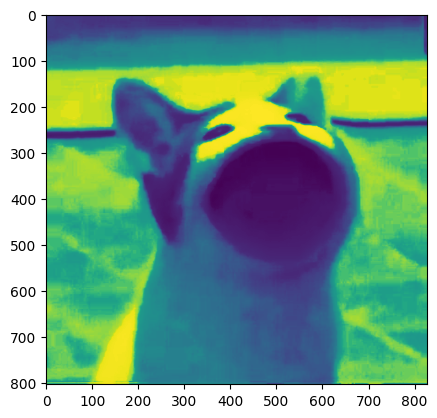

In [44]:
cat = read_img()
cat_8 = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
cat_8 = cv2.equalizeHist(cat_8)
plt.imshow(cat_8)

### 9. Найти контуры на изображении, применив фильтр Собеля

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


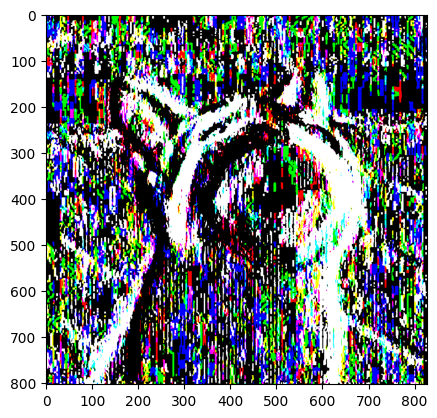

In [46]:
cat = read_img()
cat_9 = cv2.Sobel(cat, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(cat_9)

### 10. Применить операцию эрозии к изображению

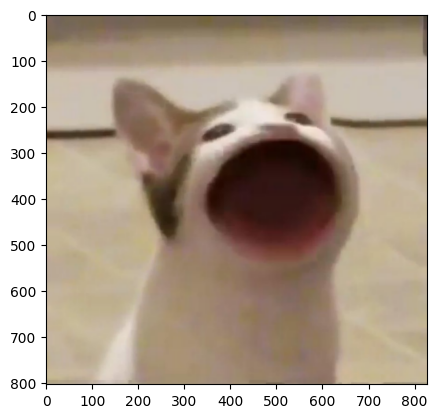

In [47]:
cat = read_img()
cat_10 = cv2.erode(cat, np.ones((5, 5), np.uint8), iterations=1)
plt.imshow(cat_10)